In [1]:
import pandas as pd 
df1=pd.read_csv("billwerder_schadstoffe_2012-2023.csv")
df2=pd.read_csv("billwerder_wetter_2012-2023.csv")
df=pd.merge(df1, df2, on="Messzeit")
rolling_mean = df['Feinstaub (µg/m3)'].rolling(window=7, min_periods=1).mean()
df['Feinstaub Mittelwert'] = rolling_mean
df.loc[df['Messzeit'] == "01.01.2019"]

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Feinstaub Mittelwert
2555,2556,01.01.2019,20.0,3.0,11.0,2.0,2556,6.7,77.3,5.1,292.0,1018.3,19.0


In [2]:
df.loc[df['Messzeit'] == "01.01.2020"]

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Feinstaub Mittelwert
2920,2921,01.01.2020,57.0,3.0,34.0,7.0,2921,0.6,95.7,1.1,200.0,1031.4,18.428571


In [3]:
df_train = df.iloc[:2555,:]
df_val = df.iloc[2555:2920,:]
df_test = df.iloc[2920:,:]

In [4]:
df_val

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Feinstaub Mittelwert
2555,2556,01.01.2019,20.0,3.0,11.0,2.0,2556,6.7,77.3,5.1,292.0,1018.3,19.000000
2556,2557,02.01.2019,11.0,3.0,18.0,2.0,2557,3.4,55.8,4.6,324.0,1028.5,18.285714
2557,2558,03.01.2019,17.0,4.0,56.0,42.0,2558,0.7,78.9,1.7,304.0,1034.7,17.142857
2558,2559,04.01.2019,10.0,3.0,34.0,5.0,2559,4.3,94.9,3.1,294.0,1028.3,15.571429
2559,2560,05.01.2019,13.0,3.0,19.0,2.0,2560,7.3,95.5,3.2,313.0,1022.1,14.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,27.12.2019,7.0,3.0,27.0,8.0,2916,2.3,87.3,1.8,41.0,1030.3,9.571429
2916,2917,28.12.2019,11.0,3.0,32.0,23.0,2917,-0.8,91.1,1.1,148.0,1040.8,10.000000
2917,2918,29.12.2019,10.0,3.0,22.0,2.0,2918,-0.1,80.0,1.8,181.0,1035.6,9.714286
2918,2919,30.12.2019,12.0,20.0,29.0,2.0,2919,7.4,29.7,2.5,236.0,1025.0,10.000000


In [5]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

In [6]:
x_train = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_train = df_train['Feinstaub (µg/m3)']
x_val = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_val = df_train['Feinstaub (µg/m3)']
x_test = df_test.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_test = df_test['Feinstaub (µg/m3)']

In [7]:
from sklearn import preprocessing
x_train = preprocessing.normalize(x_train, norm='max')

x_val = preprocessing.normalize(x_val, norm='max')

x_test = preprocessing.normalize(x_test, norm='max')


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )

2023-07-06 14:01:57.346920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

def create_nn():
    inputs = keras.layers.Input(shape=(x_train.shape[1],), name='input')

    layers_dense = keras.layers.BatchNormalization()(inputs)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")

model = create_nn()

2023-07-06 14:01:59.374945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-06 14:01:59.374974: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-06 14:01:59.374989: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l40052.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2023-07-06 14:01:59.375137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [12]:
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 6)]               0         
                                                                 
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,825
Trainable params: 5,813
Non-trainable params: 12
________________________________________________

In [13]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(x_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
75/75 - 0s - loss: 383.5990 - root_mean_squared_error: 19.5857 - val_loss: 340.1628 - val_root_mean_squared_error: 18.4435 - 480ms/epoch - 6ms/step
Epoch 2/1000
75/75 - 0s - loss: 122.3592 - root_mean_squared_error: 11.0616 - val_loss: 164.2305 - val_root_mean_squared_error: 12.8152 - 92ms/epoch - 1ms/step
Epoch 3/1000
75/75 - 0s - loss: 87.1556 - root_mean_squared_error: 9.3357 - val_loss: 135.7104 - val_root_mean_squared_error: 11.6495 - 90ms/epoch - 1ms/step
Epoch 4/1000
75/75 - 0s - loss: 78.1749 - root_mean_squared_error: 8.8417 - val_loss: 118.2399 - val_root_mean_squared_error: 10.8738 - 90ms/epoch - 1ms/step
Epoch 5/1000
75/75 - 0s - loss: 77.4050 - root_mean_squared_error: 8.7980 - val_loss: 107.8973 - val_root_mean_squared_error: 10.3874 - 89ms/epoch - 1ms/step
Epoch 6/1000
75/75 - 0s - loss: 75.9815 - root_mean_squared_error: 8.7167 - val_loss: 96.7487 - val_root_mean_squared_error: 9.8361 - 90ms/epoch - 1ms/step
Epoch 7/1000
75/75 - 0s - loss: 75.2547 - root_me

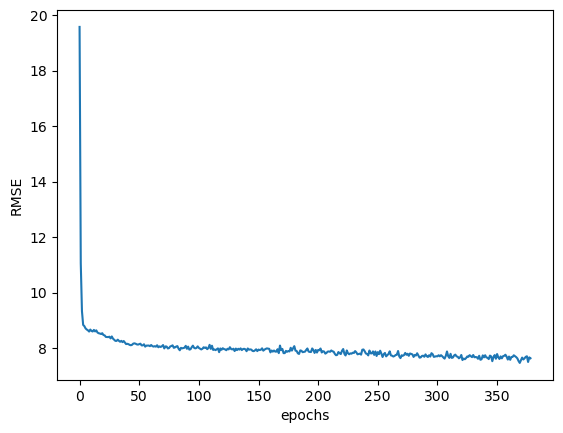

In [14]:
plot_history('root_mean_squared_error')

In [15]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

36/36 [==============================] - 0s 484us/step


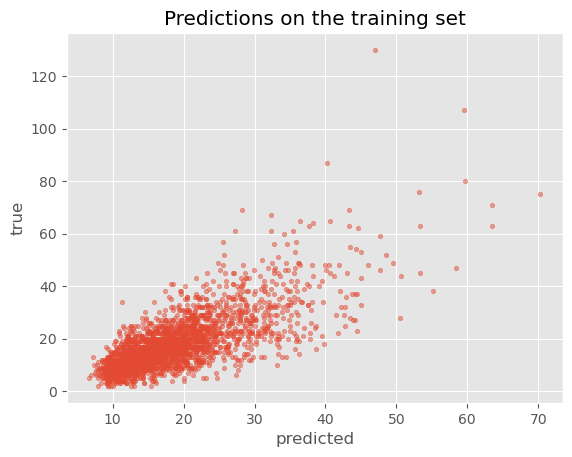

In [16]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.title(title)
   

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

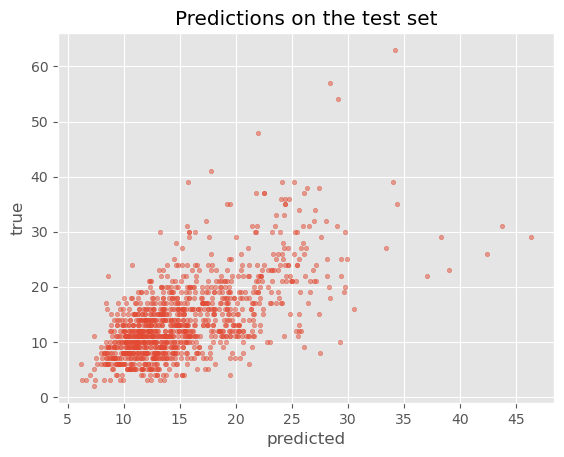

In [17]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

In [18]:
train_metrics = model.evaluate(x_train, y_train, return_dict=True)
test_metrics = model.evaluate(x_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))


36/36 [==============================] - 0s 527us/step - loss: 32.9890 - root_mean_squared_error: 5.7436
Train RMSE: 7.31, Test RMSE: 5.74


In [19]:
x_test

array([[ 5.81733566e-04,  9.27865038e-02,  1.06651154e-03,
         1.93911189e-01,  1.00000000e+00,  1.78675310e-02],
       [-5.85937500e-04,  9.61914062e-02,  1.85546875e-03,
         2.05078125e-01,  1.00000000e+00,  2.05078125e-02],
       [ 5.81911431e-03,  9.27113128e-02,  3.25475885e-03,
         2.27833120e-01,  1.00000000e+00,  2.11347977e-02],
       ...,
       [ 1.01397913e-02,  6.86158693e-02,  3.44556015e-03,
         3.16991534e-01,  1.00000000e+00,  1.29384299e-02],
       [ 9.58435208e-03,  5.28117359e-02,  1.76039120e-03,
         2.98288509e-01,  1.00000000e+00,  1.34125044e-02],
       [ 1.26071112e-02,  5.27922781e-02,  1.87136807e-03,
         2.25549099e-01,  1.00000000e+00,  1.42111410e-02]])

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_predicted, squared=False)

5.7436041285041695

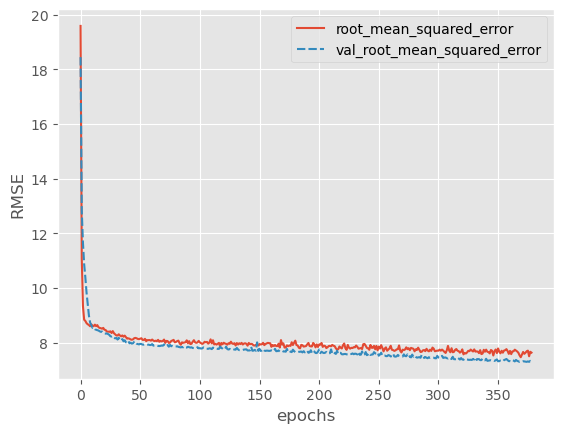

In [21]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])
